<a href="https://colab.research.google.com/github/JuliaClabunde/Trabalho---IA-/blob/main/Quest%C3%A3o%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install ucimlrepo


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)


{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'ID': 405, 'type': 'NATIVE', 'title': 'A data-driven software tool for enabling cooperative information s

In [10]:
# Verificando a quantidade de valores ausentes em cada coluna de X
missing_data = X.isnull().sum() #retorna valores nulos por coluna
print(missing_data[missing_data > 0])


Series([], dtype: int64)


In [11]:

X = X.replace("?", np.nan)#Tentando corrigir os conjuntos de dados com '?' por NaN
# Substituir os NaNs pela média apenas nas colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])  # Seleciona somente as colunas numéricas
X[X_numeric.columns] = X_numeric.fillna(X_numeric.mean())  # Preenche NaNscom as médias
#teste para conferir

# Conferindo a nova forma do conjunto de dados
print("Shape após substituir os NaNs pela média:", X.shape)

Shape após substituir os NaNs pela média: (1994, 127)


In [12]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Conferindo as formas dos conjuntos de treino e teste pelos valores dados na atividade
print("Shape do treino:", X_train.shape, y_train.shape)
print("Shape do teste:", X_test.shape, y_test.shape)

Shape do treino: (1395, 127) (1395, 1)
Shape do teste: (599, 127) (599, 1)


In [13]:
# Convertendo os dados para numérico, meio que uma certificação
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Preenchendo valores NaN com a média de cada coluna para manter mais dados
X_train = X_train.fillna(X_train.mean())#garantir que não tem valores faltantes
X_test = X_test.fillna(X_test.mean())

# Verificando as formas após a limpeza final
print("Shape final do treino:", X_train.shape, y_train.shape)
print("Shape final do teste:", X_test.shape, y_test.shape)


Shape final do treino: (1395, 127) (1395, 1)
Shape final do teste: (599, 127) (599, 1)


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Criando um imputer para substituir os NaNs pela média das colunas oficialmente
imputer = SimpleImputer(strategy="mean")

# Modelo de regressão linear
model = LinearRegression()

# ajusta o modelo de regressão
pipeline = make_pipeline(imputer, model)

# Treinando o modelo com os dados de treino (aplicando o imputer automaticamente)
pipeline.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = pipeline.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['communityname']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['communityname']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


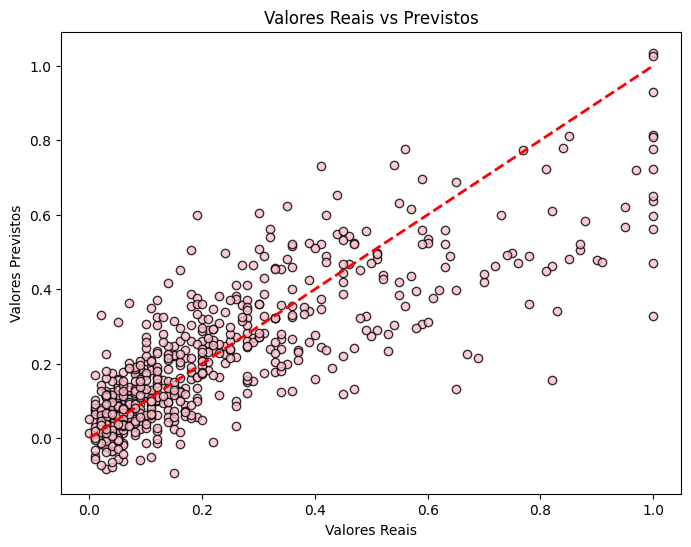

In [28]:
import matplotlib.pyplot as plt

# Plotando os valores reais vs os valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="pink", edgecolors="k", alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de identidade
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs Previstos")
plt.show()


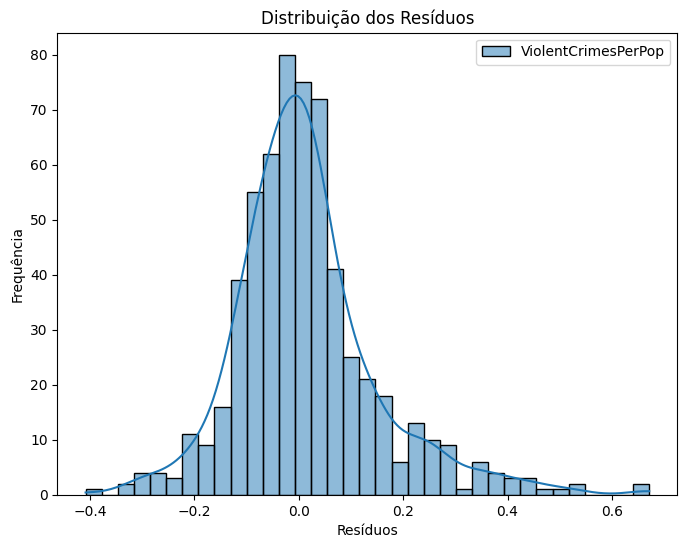

In [30]:
import seaborn as sns

# Calculando os resíduos
residuos = y_test - y_pred

# Plotando os resíduos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color="blue")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()


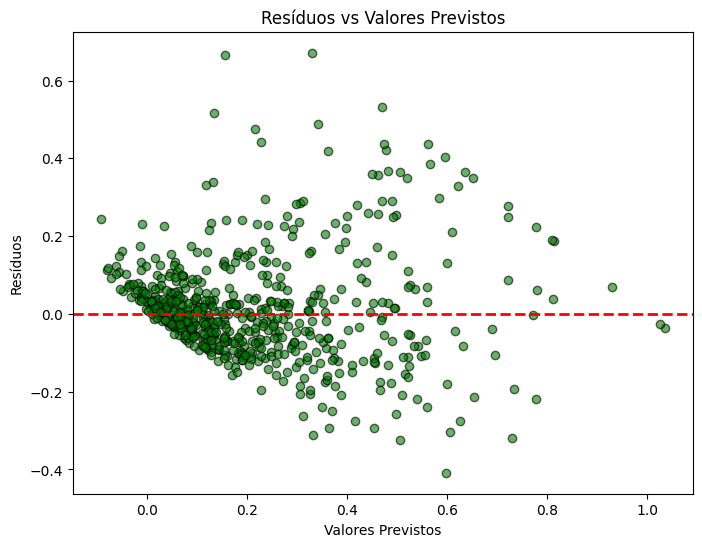

In [17]:
# Plotando os resíduos em relação aos valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color="green", edgecolors="k", alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Previstos")
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [19]:
# Fazendo previsões no conjunto de treino
y_train_pred = pipeline.predict(X_train)

# Calculando o MAE para o conjunto de treino
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculando o RMSE para o conjunto de treino
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("MAE (Treino):", mae_train)
print("RMSE (Treino):", rmse_train)


MAE (Treino): 0.08852435104336963
RMSE (Treino): 0.12557281437717102


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['communityname']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
# Fazendo previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test)

# Calculando o MAE para o conjunto de teste
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculando o RMSE para o conjunto de teste
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("MAE (Teste):", mae_test)
print("RMSE (Teste):", rmse_test)


MAE (Teste): 0.09605274997639607
RMSE (Teste): 0.1380935866518949


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['communityname']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
